In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.data_process import get_CIFAR10_data
from models.neural_net import NeuralNetwork
from kaggle_submission import output_submission_csv

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [2]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values 
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 5000

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and also the different activation functions that you implemented on the CIFAR-10 dataset below.

In [54]:
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 20
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=8000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.001, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

init
init
iteration 0 / 8000: loss 2.558625
iteration 100 / 8000: loss 2.236031
iteration 200 / 8000: loss 2.084952
iteration 300 / 8000: loss 2.101129
iteration 400 / 8000: loss 2.094615
iteration 500 / 8000: loss 1.960101
iteration 600 / 8000: loss 2.136106
iteration 700 / 8000: loss 1.939559
iteration 800 / 8000: loss 1.998954
iteration 900 / 8000: loss 1.924428
iteration 1000 / 8000: loss 1.914560
iteration 1100 / 8000: loss 1.934344
iteration 1200 / 8000: loss 1.933044
iteration 1300 / 8000: loss 1.965081
iteration 1400 / 8000: loss 1.981582
iteration 1500 / 8000: loss 1.860607
iteration 1600 / 8000: loss 1.878937
iteration 1700 / 8000: loss 1.806021
iteration 1800 / 8000: loss 1.816228
iteration 1900 / 8000: loss 1.854129
iteration 2000 / 8000: loss 1.828684
iteration 2100 / 8000: loss 1.777216
iteration 2200 / 8000: loss 1.747798
iteration 2300 / 8000: loss 1.847469
iteration 2400 / 8000: loss 1.892557
iteration 2500 / 8000: loss 1.888584
iteration 2600 / 8000: loss 1.716664
ite

# Graph loss and train/val accuracies

Examining the loss graph along with the train and val accuracy graphs should help you gain some intuition for the hyperparameters you should try in the hyperparameter tuning below. It should also help with debugging any issues you might have with your network.

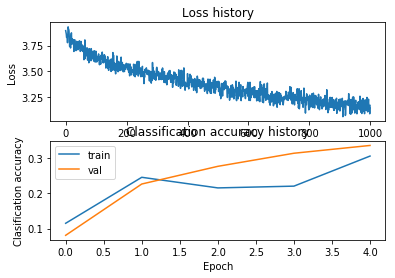

In [4]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to large model without much regularization. No gap between training and validation accuracy would indicate low model capacity. 


You will compare networks of two and three layers using the different activation functions you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 



Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 


## Two-layer Relu Activation Network 

In [49]:
best_2layer_relu = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_relu.                                                    #
#################################################################################
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 20
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net_2_relu = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

# The parameters below are the optimal hyperparameters
stats = net_2_relu.train(X_train, y_train, X_val, y_val,
            num_iters=8000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.92,
            reg=1e-05, verbose=True)

# Predict on the validation set
val_acc = (net_2_relu.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
best_2layer_relu = net_2_relu 


init
init
iteration 0 / 8000: loss 2.434339
iteration 100 / 8000: loss 1.640576
iteration 200 / 8000: loss 1.555170
iteration 300 / 8000: loss 1.609387
iteration 400 / 8000: loss 1.601874
iteration 500 / 8000: loss 1.660892
iteration 600 / 8000: loss 1.433028
iteration 700 / 8000: loss 1.658491
iteration 800 / 8000: loss 1.453665
iteration 900 / 8000: loss 1.512835
iteration 1000 / 8000: loss 1.497441
iteration 1100 / 8000: loss 1.458060
iteration 1200 / 8000: loss 1.452535
iteration 1300 / 8000: loss 1.444733
iteration 1400 / 8000: loss 1.427602
iteration 1500 / 8000: loss 1.581782
iteration 1600 / 8000: loss 1.472248
iteration 1700 / 8000: loss 1.441195
iteration 1800 / 8000: loss 1.455024
iteration 1900 / 8000: loss 1.437041
iteration 2000 / 8000: loss 1.513295
iteration 2100 / 8000: loss 1.548226
iteration 2200 / 8000: loss 1.409362
iteration 2300 / 8000: loss 1.449760
iteration 2400 / 8000: loss 1.307946
iteration 2500 / 8000: loss 1.302869
iteration 2600 / 8000: loss 1.356165
ite

## Two-layer Sigmoid Activation Network 

In [27]:
best_2layer_sigmoid = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_sigmoid.                                                    #
#################################################################################
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 20
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net_2_sigmoid = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')

# The parameters below are the optimal hyperparameters
stats = net_2_sigmoid.train(X_train, y_train, X_val, y_val,
            num_iters=8000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.95,
            reg=0.001, verbose=True)

# Predict on the validation set
val_acc = (net_2_sigmoid.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
best_2layer_sigmoid = net_2_sigmoid

init
init
iteration 0 / 8000: loss 2.395958
iteration 100 / 8000: loss 1.937149
iteration 200 / 8000: loss 1.813456
iteration 300 / 8000: loss 1.710235
iteration 400 / 8000: loss 1.849772
iteration 500 / 8000: loss 1.854510
iteration 600 / 8000: loss 1.766536
iteration 700 / 8000: loss 1.672057
iteration 800 / 8000: loss 1.735284
iteration 900 / 8000: loss 1.734708
iteration 1000 / 8000: loss 1.661553
iteration 1100 / 8000: loss 1.758427
iteration 1200 / 8000: loss 1.678100
iteration 1300 / 8000: loss 1.706238
iteration 1400 / 8000: loss 1.691245
iteration 1500 / 8000: loss 1.669088
iteration 1600 / 8000: loss 1.612037
iteration 1700 / 8000: loss 1.652594
iteration 1800 / 8000: loss 1.702863
iteration 1900 / 8000: loss 1.629879
iteration 2000 / 8000: loss 1.742476
iteration 2100 / 8000: loss 1.548109
iteration 2200 / 8000: loss 1.559842
iteration 2300 / 8000: loss 1.643610
iteration 2400 / 8000: loss 1.767126
iteration 2500 / 8000: loss 1.703175
iteration 2600 / 8000: loss 1.681802
ite

## Three-layer Relu Activation Network 

In [47]:
best_3layer_relu = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_relu.                                                    #
#################################################################################
input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 20
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net_3_relu = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

# The parameters below are the optimal hyperparameters
stats = net_3_relu.train(X_train, y_train, X_val, y_val,
            num_iters=8000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.9,
            reg=0.01, verbose=True)

# Predict on the validation set
val_acc = (net_3_relu.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
best_3layer_relu = net_3_relu

init
init
init
iteration 0 / 8000: loss 2.763569
iteration 100 / 8000: loss 1.938355
iteration 200 / 8000: loss 1.823014
iteration 300 / 8000: loss 1.803418
iteration 400 / 8000: loss 1.827401
iteration 500 / 8000: loss 1.755698
iteration 600 / 8000: loss 1.890177
iteration 700 / 8000: loss 1.708097
iteration 800 / 8000: loss 1.815078
iteration 900 / 8000: loss 1.704471
iteration 1000 / 8000: loss 1.576958
iteration 1100 / 8000: loss 1.700477
iteration 1200 / 8000: loss 1.503689
iteration 1300 / 8000: loss 1.663115
iteration 1400 / 8000: loss 1.596131
iteration 1500 / 8000: loss 1.799558
iteration 1600 / 8000: loss 1.682485
iteration 1700 / 8000: loss 1.532139
iteration 1800 / 8000: loss 1.541665
iteration 1900 / 8000: loss 1.653181
iteration 2000 / 8000: loss 1.624564
iteration 2100 / 8000: loss 1.525944
iteration 2200 / 8000: loss 1.532972
iteration 2300 / 8000: loss 1.588446
iteration 2400 / 8000: loss 1.619374
iteration 2500 / 8000: loss 1.547981
iteration 2600 / 8000: loss 1.48938

## Three-layer Sigmoid Activation Network 

In [30]:
best_3layer_sigmoid = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_sigmoid.                                                    #
#################################################################################
input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 20
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net_3_sigmoid = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')

# The parameters below are the optimal hyperparameters
stats = net_3_sigmoid.train(X_train, y_train, X_val, y_val,
            num_iters=8000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.99,
            reg=0.0001, verbose=True)

# Predict on the validation set
val_acc = (net_3_sigmoid.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
best_3layer_sigmoid = net_3_sigmoid 

init
init
init
iteration 0 / 8000: loss 2.378224
iteration 100 / 8000: loss 2.221489
iteration 200 / 8000: loss 2.158907
iteration 300 / 8000: loss 2.079334
iteration 400 / 8000: loss 2.119641
iteration 500 / 8000: loss 1.940198
iteration 600 / 8000: loss 1.868415
iteration 700 / 8000: loss 1.938599
iteration 800 / 8000: loss 1.846637
iteration 900 / 8000: loss 1.921527
iteration 1000 / 8000: loss 1.834612
iteration 1100 / 8000: loss 1.804936
iteration 1200 / 8000: loss 1.751597
iteration 1300 / 8000: loss 1.776751
iteration 1400 / 8000: loss 1.728836
iteration 1500 / 8000: loss 1.704875
iteration 1600 / 8000: loss 1.710147
iteration 1700 / 8000: loss 1.796857
iteration 1800 / 8000: loss 1.708099
iteration 1900 / 8000: loss 1.677808
iteration 2000 / 8000: loss 1.660901
iteration 2100 / 8000: loss 1.720025
iteration 2200 / 8000: loss 1.752379
iteration 2300 / 8000: loss 1.743757
iteration 2400 / 8000: loss 1.711593
iteration 2500 / 8000: loss 1.688301
iteration 2600 / 8000: loss 1.63752

# Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

In [50]:
print('Two-layer relu')
test_acc = (best_2layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer relu
Test accuracy:  0.4704


In [51]:
print('Two-layer sigmoid')
test_acc = (best_2layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer sigmoid
Test accuracy:  0.445


In [52]:
print('Three-layer relu')
test_acc = (best_3layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer relu
Test accuracy:  0.4924


In [53]:
print('Three-layer sigmoid')
test_acc = (best_3layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer sigmoid
Test accuracy:  0.4314


# Kaggle output

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 2 Neural Network. Use the following code to do so:

In [59]:
output_submission_csv('nn_2layer_relu_submission.csv', best_2layer_relu.predict(X_test))

In [60]:
output_submission_csv('nn_2layer_sigmoid_submission.csv', best_2layer_sigmoid.predict(X_test))

In [61]:
output_submission_csv('nn_3layer_relu_submission.csv', best_3layer_relu.predict(X_test))

In [62]:
output_submission_csv('nn_3layer_sigmoid_submission.csv', best_3layer_sigmoid.predict(X_test))